# Klusterointi

## Teoriaosuuden sisältö
* Ohjattu koneoppiminen vs ohjaamaton koneoppiminen
* Etäisyyden käsite
* Klusterointityypit
    - Hierarkinen klusterointi
    - Osittava klusterointi

Klusterointi on ohjaamattoman koneoppimisen menetelmä. Erona ohjattuun koneoppimiseen ohjaamattoman koneoppimisen tapauksessa datapisteille ei ole luokkia ja menetelmän tarkoitus onkin havaita datassa samankaltaisuutta ja hahmoja (patterns). 

## Etäisyys
Klusteroinnin tavoite onkin ryhmitellä joukko datapisteitä ryhmiin niiden samankaltaisuuden perusteella. Klusteroinnin kannalta tärkeä käsite onkin samankaltaisuus, eli **etäisyys**. Suurimmalle osalle tutuin on varmasti Euklidinen etäisyys eli dist=$\sqrt{\sum_{i=1}^n(x_1-x_2)^2}$, joka mittaa kahden pisteen etäisyyttä n-ulotteisessa avaruudessa.

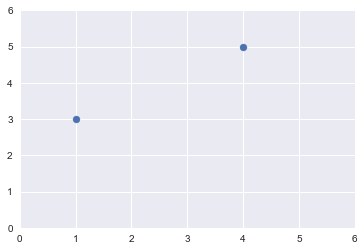

In [62]:
first_point=(1,3)
second_point=(4,5)

from matplotlib import pyplot as plt
import scipy as sp
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

x, y=np.array([first_point,second_point]).T
plt.axis([0, 6, 0, 6])
plt.scatter(x, y)

In [63]:
sp.spatial.distance.euclidean(first_point, second_point)

3.605551275463989

In [64]:
np.sqrt(np.power(x[0]-x[1], 2)+np.power(y[0]-y[1], 2))

3.605551275463989

Euklidisen etäisyyksien lisäksi on myös monia muita tapoja mitata numeeristen arvojen etäisyyttä toisistaan, esimerkiksi:
* Manhattan etäisyys
* kosini samankaltaisuus

Etäisyys on helppo ymmärtää, kun kyse on numeerisista muuttujista, mutta mitä jos halutaan laskea kuvien etäisyys toisistaan, tai sanojen? Miten esimerkiksi mittaisit seuraavien kuvien etäisyyttä toisistaan?

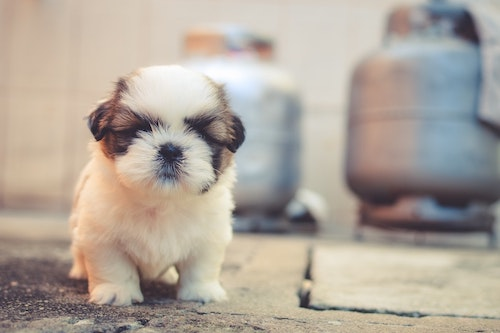

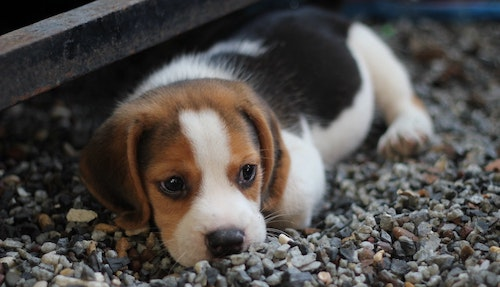

Entäpä miten mittaisit seuraavien lauseiden etäisyyden?

"Maanantai on kamala päivä Karvisen mielestä."
"Tiistai on kamala päivä Karvisen mielestä!"

## Klusterointitavat

Klusterointia voidaan tehdä monin eri tavoin. Yksinkertaisimmat klusterointimallit ovat hierarkiset mallit, osittavat (partitioning) mallit ja verkkoperustaiset (graph-based) mallit. 

**Hierarkisen mallin** tapauksessa datapisteistä pyritään muodostamaan hierarkia, joka määräytyy pisteiden samankaltaisuuden tai erilaisuuden perusteella. Etäisyyden mitan valitsemisen lisäksi valitaan *yhdistämisehto*. Kaksi klusteria voidaan yhdistää niiden kauimpina olevien datapisteiden perusteella, tai lähimpien datapisteiden perusteella. 

Esimerkiksi:
Alla on etäisyysmatriisi, joka kuvaa pisteiden a, b, c ja d etäisyyttä toisiinsa. Halutaan tässä tapauksessa yhdistää klusterit kauimpina olevien datapisteiden perusteella.

|   | a   | b     | c     | d    
|---|  --- | :---: | :---: | ---: 
| a | 0   | 2     | 5     | 19   
| b | 2 | 0 | 7 | 15
|c  | 5| 7|0|1
|d  | 19 | 15 | 1 | 0

Koska pisteet c ja d ovat lähimpänä toisiaan, yhdistetään ne. Lasketaan sitten klusterin etäisyys jäljellä oleviin pisteisiin.

$max(D(c, a), D(d, a))=max(5, 19)=19$
 
$max(D(b, c), D(b, d))=max(7, 15)=15$


ja saadaan uusi etäisyysmatriisi:

|   | a   | b   | (c, d) 
|--- | :---: | :---: | ---:
|a  | 0   | 2   | 19 
|b  | 2   | 0   | 15 
|(c, d)  | 19  | 15  | 0

Tässä lyhin etäisyys on a:n ja b:n välillä, joten niistä tulee toinen klusteri. Voidaan laskea vielä (a,b) ja (c,d) klusterien etäisyys toisistaan:

$max(D(a(c,d)), D(b(c,d)))=max(19, 15)=19$

eli lopullinen klusteri on ((a,b),(c,d)).

## Osittava klusterointi

Osittavalla klusteroinnilla tarkoitetaan klusterointia, jossa yritetään optimoida jokin mitta, esimerkiksi etäisyyden neliö. Usein osittavassa klusteroinnissa määritellään etukäteen, kuinka monta klusteria lopuksi halutaan.

Esimerkkejä osittavasta klusteroinnista ovat k-keskiarvot (k-means), k-medoidit (k-medoids) ja k-mediaanit (k-medians). Ne kaikki ovat samankaltaisia, mutta yrittävät optimoida eri mittaa.

### K-keskiarvot

K-keskiarvot -algoritmissa valitaan ensin kuinka monta klusteria halutaan, eli k:n arvo ja valitaan k pistettä lähtökeskiarvoiksi tai jaetaan datapisteet k:hen ryhmään satunnaisesti. Tämän jälkeen k-keskiarvot -algoritmissa toistetaan kahta vaihetta:
1. Valitse kaikille datapisteille klusteri sen perusteella, mikä niiden neliöllinen etäisyys on nykyisistä keskiarvoista ja
2. laske uudet klusterien keskiarvot

Määritellään joukko datapisteitä:

In [65]:
a = (1,3)
b = (4,2)
c = (15,3)
d = (10,8)
e = (14, 9)

ja aloitetaan tilanteesta, jossa klusterit ovat (a,c, e) ja (b, d). Lasketaan niiden keskiarvot ja piirretään datapisteet ja keskiarvot koordinaatistoon.

In [66]:
first_mean=(((a[0]+c[0]+e[0])/3), ((a[1]+c[1]+e[1])/3))
print(first_mean)

second_mean=(((b[0]+d[0])/2), ((b[1]+d[1])/2))
print(second_mean)

(10.0, 5.0)
(7.0, 5.0)


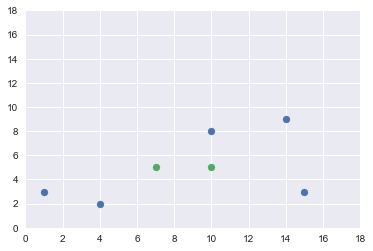

In [67]:
x, y=np.array([a,b,c,d, e]).T
plt.axis([0, 18, 0, 18])
plt.scatter(x, y)
z, w =np.array([first_mean, second_mean]).T
plt.scatter(z, w)
plt.show()

Lasketaan sen jälkeen datapisteiden etäisyys keskiarvoihin käyttäen euklidista etäisyyttä:

In [68]:
print('Distance from a to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, a)))
print('Distance from a to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, a)))

print('Distance from b to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, b)))
print('Distance from b to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, b)))

print('Distance from c to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, c)))
print('Distance from c to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, c)))

print('Distance from d to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, d)))
print('Distance from d to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, d)))

print('Distance from e to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, e)))
print('Distance from e to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, e)))

Distance from a to first cluster mean: 9.219544457292887
Distance from a to second cluster mean: 6.324555320336759
Distance from b to first cluster mean: 6.708203932499369
Distance from b to second cluster mean: 4.242640687119285
Distance from c to first cluster mean: 5.385164807134504
Distance from c to second cluster mean: 8.246211251235321
Distance from d to first cluster mean: 3.0
Distance from d to second cluster mean: 4.242640687119285
Distance from e to first cluster mean: 5.656854249492381
Distance from e to second cluster mean: 8.06225774829855


Näiden etäisyyksien perusteella uudet klusterit ovat (a, b) ja (c, d, e). Lasketaan uudet keskiarvot:

In [69]:
first_mean=(((a[0]+b[0])/2), ((a[1]+b[1])/2))
print(first_mean)

second_mean=(((c[0]+d[0]+e[0])/3), ((c[1]+d[1]+e[1])/3))
print(second_mean)

(2.5, 2.5)
(13.0, 6.666666666666667)


In [70]:
print('Distance from a to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, a)))
print('Distance from a to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, a)))

print('Distance from b to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, b)))
print('Distance from b to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, b)))

print('Distance from c to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, c)))
print('Distance from c to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, c)))

print('Distance from d to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, d)))
print('Distance from d to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, d)))

print('Distance from e to first cluster mean: {}'.format(sp.spatial.distance.euclidean(first_mean, e)))
print('Distance from e to second cluster mean: {}'.format(sp.spatial.distance.euclidean(second_mean, e)))

Distance from a to first cluster mean: 1.5811388300841898
Distance from a to second cluster mean: 12.54768681647914
Distance from b to first cluster mean: 1.5811388300841898
Distance from b to second cluster mean: 10.137937550497034
Distance from c to first cluster mean: 12.509996003196804
Distance from c to second cluster mean: 4.176654695380556
Distance from d to first cluster mean: 9.300537618869138
Distance from d to second cluster mean: 3.2829526005987013
Distance from e to first cluster mean: 13.209844813622906
Distance from e to second cluster mean: 2.5385910352879693


Nyt etäisyydet klusterien keskiarvoihin ei enää muuttunut, eikä siis klustereihin tullut enää muutoksia, joten läpikäynti voidaan lopettaa.

Oikeastihan näitä ei ikinä lasketa itse, vaan käytetään valmiita kirjastoja sitä varten. Otetaan tästä esimerkki. 

Käytetään esimerkissä datasettiä, joka on alunperin [Kagglesta](https://www.kaggle.com/mehdidag/pima-indians) ja joka sisältää tietoa alkuperäisasukkaiden terveydentilasta ja siitä, onko heillä näkyvissä diabeteksen esiasteita.

Luetaan data sisään ja tutkitaan sitä edellisten kertojen tapaan. Koska mukana on tieto diabeteksen esiasteesta, poistetaan se sarake.

In [71]:
import pandas as pd
import numpy as np

df=pd.read_csv('../Mall_customers.csv')
#df_test=df[['test', '']]
#df=df.drop('test', axis=1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
df.shape

(200, 5)

In [73]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [74]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [75]:
df['Gender']=np.where(df['Gender']=='Male', 1, 0)

In [76]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


Seuraavaksi voitaisiin hieman tehdä pientä kokeilua, miten klusterien määrä vaikuttaa klusterien datapisteiden etäisyyksien neliölliseen summaan eli varianssiin.

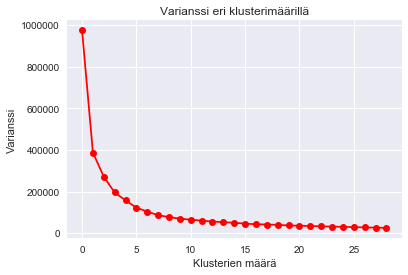

In [77]:
from sklearn.cluster import KMeans

variances = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, max_iter=200) 
    kmeans.fit_predict(df)
    variances.append(kmeans.inertia_)
    
plt.plot(variances, 'ro-', label="Variance")
plt.title("Varianssi eri klusterimäärillä")
plt.xlabel("Klusterien määrä")
plt.ylabel("Varianssi")
plt.show()

Valitaan tämän perusteella k:n arvoksi 5. Tämän jälkeen varianssi ei enää merkittävästi pienene.

In [78]:
kmeans = KMeans(n_clusters=5, max_iter=200) 
clusters=kmeans.fit_predict(df)

In [79]:
df['cluster']=clusters

In [80]:
df=df.drop('CustomerID', axis=1)

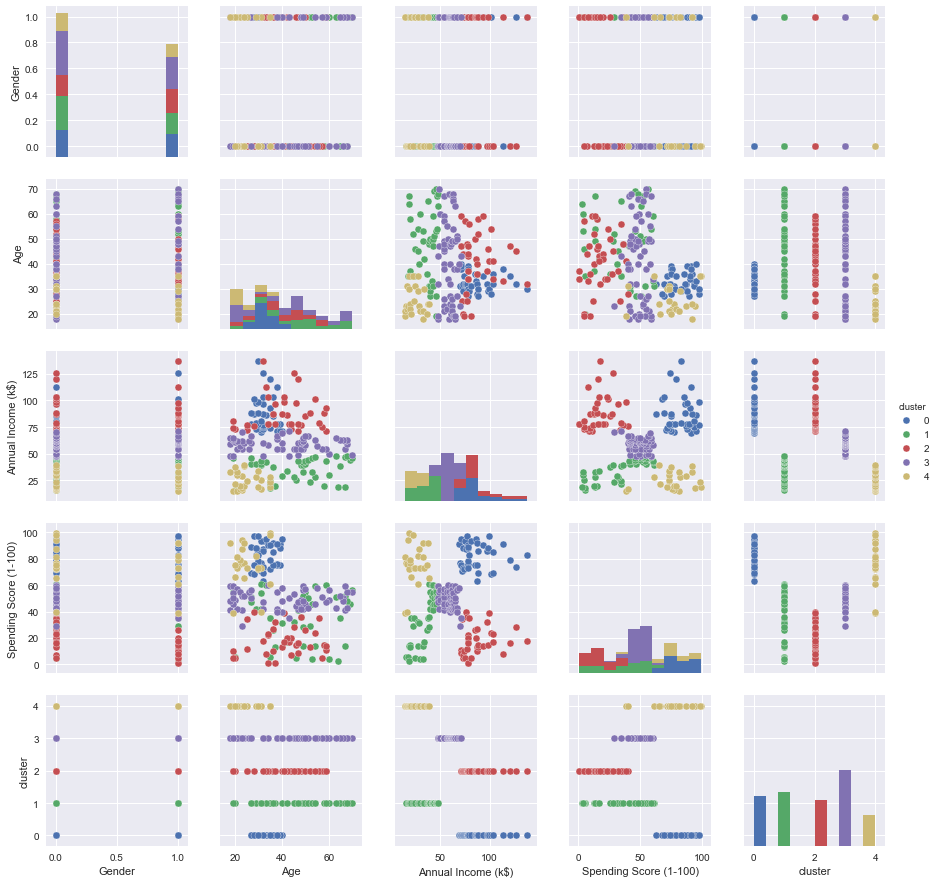

In [81]:
import seaborn as sn

sn.set()

sn.pairplot(df, hue='cluster')

Millaisia asiakassegmenttejä löydät?